In [159]:
import urllib3

def get_request(uri):
    ua = "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"  
    h = {"User-Agent": ua}
    httpPool = urllib3.PoolManager()
    return httpPool.request('GET',uri,fields=None,headers=h)

In [160]:
import json

from bs4 import BeautifulSoup


with open('URL.json',"r") as f:
    urls = json.load(f)

DATA = list(map(lambda x: [x['name'],x['URL'],x['HTML'],x['class']],urls['periodicos']))

textos=[]
longitudEnlace={}
for index,dato in enumerate(DATA):
    soup = BeautifulSoup(get_request(dato[1]).data,'html.parser')
    textos.append(list(map(lambda x:x.text,soup.find_all(dato[2],{"class":dato[3]}))))
    longitudEnlace[dato[1]]=len(textos[index])

In [161]:
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('spanish') #Listado de palabras a eliminar

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser"] #Añadimos algunos caractéres que hemos encontrado

stop_words[:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [208]:
for sw in stop_words:
    clean_texto = [[s.replace(sw, '')] for l in textos for s in l]

clean_texto_list=[]
for stop in stop_words:
    try:
        for index,i in enumerate(clean_texto):
            clean_texto_oracion = [j.strip() for j in i[0].split(" ")]
            while stop in clean_texto_list: clean_texto_list.remove(stop)
            clean_texto_list.append(" ".join(clean_texto_oracion))
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

TypeError: sequence item 0: expected str instance, list found

In [ ]:
textoLimpio = []
caracterBasura="\n"
textosSinCaracterBasura=[]
for value in clean_texto:
    textosSinCaracterBasura.append([x.replace(caracterBasura,'') for x in value])

for index,value in enumerate(clean_texto):
    textoLimpio.append(list(map(lambda x:" ".join(list(filter(lambda y:len(str(y))>3,(x.split(" "))))),textosSinCaracterBasura[index])))

In [173]:
textoUnido = [y for x in textoLimpio for y in x]
textosSinCaracterBasura = [y for x in textosSinCaracterBasura for y in x]

In [186]:
# Menos óptimo

# PALABRA CON VALOR
from copy import deepcopy


palabraValor={}

# FRASES CON MÁS PUNTUACIÓN
frasesTotalValor={}

for index,frase in enumerate(textoUnido):
    fraseValores=[]
    for palabra in frase.split(" "):
        valor=0
        for frase2 in textoUnido:
            valor+=frase2.count(palabra)
        palabraValor[palabra.lower()] = valor
        fraseValores.append(valor)
    # Guardo la frase con las sílabas con 3 caracteres, pero no cuentan en la suma
    frasesTotalValor[textosSinCaracterBasura[index]]=(sum(fraseValores)/len(fraseValores))

A


In [185]:
# Ordeno los diccionarios por sus valores
frasesSinOrden = dict(zip(frasesTotalValor, map(lambda x:x/max(frasesTotalValor.values()), frasesTotalValor.values())))
frasesTotalValor = dict(sorted(frasesSinOrden.items(), key=lambda item: item[1],reverse=True))
frasesTotalValor

{'Sudoku para expertos': 1.0,
 'Nàstic: Brazalete para la esperanza': 0.75,
 'APUESTAS | La mejor información para jugar': 0.7096153846153848,
 'La plancha para vitrocerámica que arrasa en Amazon': 0.6461538461538462,
 '¿Qué músculos son necesarios para correr?': 0.6346153846153847,
 '¡Aparece Lewandowski para empatar el partido!': 0.6115384615384616,
 "Alphonso Davies, ¿un 'drama' para el Madrid?": 0.6115384615384616,
 'A la venta las entradas para el concierto de Emilia en A Coruña': 0.5817307692307693,
 'El Barça visita al Barcelos para asegurar los cuartos de Champions': 0.5604395604395604,
 'Cuatro trucos para cocer bien el pulpo': 0.5480769230769231,
 'Estas son las ciudades que eligen los multimillonarios para vivir': 0.5480769230769231,
 'Los requisitos que aún debe cumplir Madrid para albergar el Gran Premio de Fórmula 1': 0.5448717948717949,
 'Kimmich podría esperar al Barça para fichar libre': 0.543956043956044,
 'Inscripciones abiertas para la Copa MARNATON eDreams 2024': 0

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'para'),
  Text(1, 0, 'acción'),
  Text(2, 0, 'come'),
  Text(3, 0, 'madrid'),
  Text(4, 0, 'ante'),
  Text(5, 0, 'comentarios'),
  Text(6, 0, 'esta'),
  Text(7, 0, 'años'),
  Text(8, 0, 'contra'),
  Text(9, 0, 'barça')])

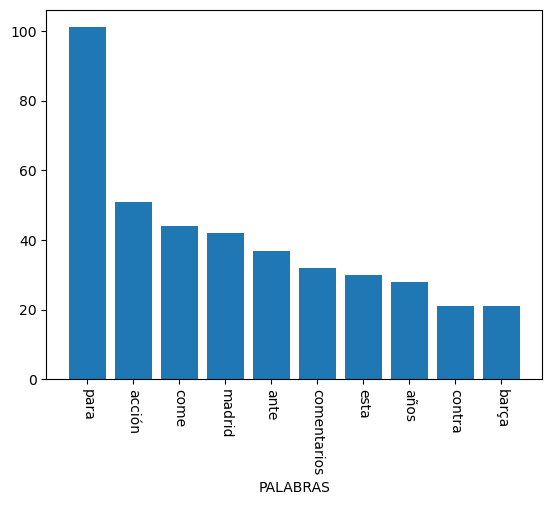

In [167]:
import matplotlib.pyplot as plt
from pandas import DataFrame

diccionario_ordenado = sorted(palabraValor.items(), key=lambda x: x[1], reverse=True)
diez_mas_grandes = dict(diccionario_ordenado[:10])

plt.bar(diez_mas_grandes.keys(),diez_mas_grandes.values())
plt.xlabel("PALABRAS")
plt.xticks(rotation=-90)

**Librería para manejo de HTML**

In [168]:
#!conda install -y -c conda-forge airium

In [169]:
import time
from airium import Airium
from pymysql import Time

a = Airium()


a('<!DOCTYPE html>')
with a.html(lang="pl"):
    with a.head():
        a.meta(charset="utf-8")
        a.title(_t="Página de noticias")
    with a.body():
        for key,value in frasesTotalValor.items():
            with a.p(style=f"font-size:{value+1}em;"):
                a(key)

html = str(a)  # casting to string extracts the value
# or directly to UTF-8 encoded bytes:
html_bytes = bytes(a)  # casting to bytes is a shortcut to str(a).encode('utf-8')

with open(f"resultado-{time.localtime().tm_year}-{time.localtime().tm_mon}-{time.localtime().tm_mday}.html","w+") as f:
    f.write(html)


In [170]:
longitudEnlace

{'http://www.lavozdegalicia.com': 127,
 'https://www.sport.es/es/': 180,
 'https://www.eldiario.es/': 87,
 'https://www.elmundo.es/': 47,
 'https://elpais.com/': 146}

In [171]:
list(frasesTotalValor.items())[:20]

[('Sudoku para expertos', 1.0),
 ('Nàstic: Brazalete para la esperanza', 0.75),
 ('APUESTAS | La mejor información para jugar', 0.7096153846153848),
 ('La plancha para vitrocerámica que arrasa en Amazon', 0.6461538461538462),
 ('¿Qué músculos son necesarios para correr?', 0.6346153846153847),
 ('¡Aparece Lewandowski para empatar el partido!', 0.6115384615384616),
 ("Alphonso Davies, ¿un 'drama' para el Madrid?", 0.6115384615384616),
 ('A la venta las entradas para el concierto de Emilia en A Coruña',
  0.5817307692307693),
 ('El Barça visita al Barcelos para asegurar los cuartos de Champions',
  0.5604395604395604),
 ('Cuatro trucos para cocer bien el pulpo', 0.5480769230769231),
 ('Estas son las ciudades que eligen los multimillonarios para vivir',
  0.5480769230769231),
 ('Los requisitos que aún debe cumplir Madrid para albergar el Gran Premio de Fórmula 1',
  0.5448717948717949),
 ('Kimmich podría esperar al Barça para fichar libre', 0.543956043956044),
 ('Inscripciones abiertas par